In [74]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

Upload sc-rnaseq matrix and cell type lables 

In [6]:
norm_data = pd.read_csv('../data/normalized_expr_mat.csv', index_col=0)

In [7]:
norm_data

,a,abd-A,Abd-B,Abl,abo,ac,acj6,Acph-1,Act5C,Act42A,...,lncRNA:CR43716,lncRNA:CR44997,asRNA:CR45151,lncRNA:CR45310,lncRNA:CR45425,asRNA:CR45822,asRNA:CR45891,lncRNA:CR45961,lncRNA:CR46032,lncRNA:CR46119
TP1_AACTCAGGTAAATACG,0.0,0.000000,0.0,0.0,0.466624,0.000000,0.0,0.0,2.764117,1.750383,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_TCACGAATCTATCGCC,0.0,1.053208,0.0,0.0,0.000000,0.483831,0.0,0.0,2.879282,1.053208,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_TACGGTACAATAGAGT,0.0,0.813928,0.0,0.0,0.000000,0.000000,0.0,0.0,2.458085,1.059571,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_CAACTAGAGAGACGAA,0.0,0.000000,0.0,0.0,0.000000,0.888313,0.0,0.0,2.728522,2.006819,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_GCGCCAAAGTCGATAA,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.294131,1.989672,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TP2.2_AACACGTCATTCACTT,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.463590,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP2.2_TCTTTCCGTACCGTTA,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.506908,2.466545,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP2.2_GATTCAGCACACGCTG,0.0,2.470005,0.0,0.0,0.000000,1.858055,0.0,0.0,3.119940,1.858055,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP2.2_TGAGCATGTGATGTCT,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.854410,2.466052,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0


In [9]:
labels = pd.read_csv('../data/cell_type.csv', index_col=0)
labels

,type
TP1_AACTCAGGTAAATACG,5-6
TP1_TCACGAATCTATCGCC,7-1
TP1_TACGGTACAATAGAGT,7-1
TP1_CAACTAGAGAGACGAA,7-4
TP1_GCGCCAAAGTCGATAA,1-1
...,...
TP2.2_AACACGTCATTCACTT,6-2
TP2.2_TCTTTCCGTACCGTTA,6-2
TP2.2_GATTCAGCACACGCTG,7-4
TP2.2_TGAGCATGTGATGTCT,3-2


In [31]:
labels.type.unique().tolist()

['5-6',
 '7-1',
 '7-4',
 '1-1',
 '1-2',
 '5-2',
 'MG',
 '5-3',
 '3-5',
 '3-2',
 '2-5',
 '4-2',
 '5-4',
 '6-2',
 '2-4']

In [13]:
norm_data = norm_data.join(labels)

In [18]:
X = norm_data.iloc[:,:-1]
Y = norm_data.iloc[:,-1:]

In [60]:
clf = tree.DecisionTreeClassifier()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [61]:
clf = clf.fit(X_train, y_train)

[Text(0.7959046987052384, 0.9857142857142858, 'x[2483] <= 0.576\ngini = 0.908\nsamples = 2582\nvalue = [234, 258, 167, 98, 145, 52, 83, 51, 273, 90, 56\n228, 164, 454, 229]'),
 Text(0.6979074217265863, 0.9571428571428572, 'x[1906] <= 2.205\ngini = 0.913\nsamples = 1986\nvalue = [229, 249, 151, 85, 139, 50, 78, 48, 208, 87, 7\n211, 157, 82, 205]'),
 Text(0.6252981261279446, 0.9285714285714286, 'x[735] <= 0.767\ngini = 0.908\nsamples = 1797\nvalue = [226, 249, 150, 81, 138, 49, 74, 47, 207, 84, 7\n207, 155, 82, 41]'),
 Text(0.5188333343227584, 0.9, 'x[1829] <= 0.789\ngini = 0.902\nsamples = 1652\nvalue = [222, 247, 149, 80, 137, 46, 74, 47, 204, 84, 7\n205, 27, 82, 41]'),
 Text(0.3857859695573708, 0.8714285714285714, 'x[6686] <= 3.052\ngini = 0.875\nsamples = 1132\nvalue = [220, 244, 137, 79, 11, 46, 6, 46, 92, 74, 7, 25\n27, 80, 38]'),
 Text(0.2858671518806991, 0.8428571428571429, 'x[1180] <= 0.832\ngini = 0.862\nsamples = 728\nvalue = [211, 36, 36, 77, 7, 42, 6, 46, 90, 15, 7, 20\n27, 

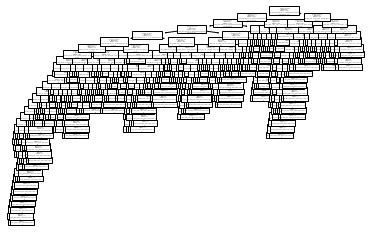

In [62]:
tree.plot_tree(clf)

In [63]:
acc_train = clf.score(X_train, y_train)
print("Accuracy on train = %0.4f " % acc_train)
acc_test = clf.score(X_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)

Accuracy on train = 1.0000 
Accuracy on test = 0.6677 


In [64]:
y_predicteds = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predicteds)
print("Confusion matrix: ")
print(cm)

Confusion matrix: 
[[ 87   3   4   0   1   2   1   2   6   0   0   3   4   8   2]
 [ 11  80   6   1   3   1   1   1   0   9   0   0   4   5   2]
 [  4   9  47   1   1   0   2   0   2   6   0   1   2   6   2]
 [  1   2   0  27   1   1   0   0   1   1   0   1   1   4   4]
 [  3   3   1   0  43   1   4   0   0   1   0  12   4   0   0]
 [  1   1   0   2   0   5   1   0   2   3   0   2   3   2   1]
 [  0   0   3   0   5   1  34   0   0   1   0   5   1   1   4]
 [  0   1   1   0   0   0   0  14   5   0   1   0   1   1   2]
 [  2   1   0   1   3   1   2  11  78   1   6   9   6   5   1]
 [  0   2   4   0   0   2   2   0   0  28   0   0   0   0   1]
 [  0   0   0   0   0   0   0   4  10   2  17   0   0   2   0]
 [  4   4   4   1   7   0   2   0   2   1   0  54   2   0   1]
 [  7   5   0   0   0   3   0   3   3   0   0   3  58   1   1]
 [  6   6   6   5   3   2   4   0   5   0   4   3   2 174   3]
 [  3   0   3   1   2   0   3   2   2   0   2   4   3   4 104]]


In [65]:
display_labels=labels.type.unique().tolist()

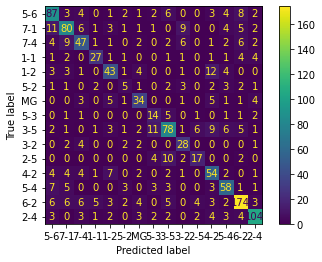

In [66]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, 
    display_labels=display_labels
    )
disp.plot()

normalized confusion matrix

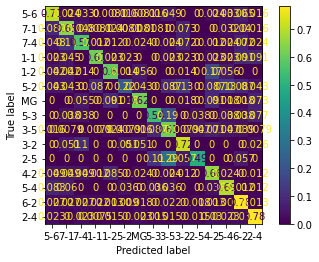

In [67]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=display_labels,
        normalize='true',
    )


Features importance

array([0., 0., 0., ..., 0., 0., 0.])

TO DO: feature selection (start with variance)